In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.pipeline import Pipeline
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("parkinsons - parkinsons.csv")

In [4]:
df.shape

(195, 24)

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df.drop_duplicates(inplace=True)
df.dropna(axis=1,how='all',inplace=True)

In [8]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

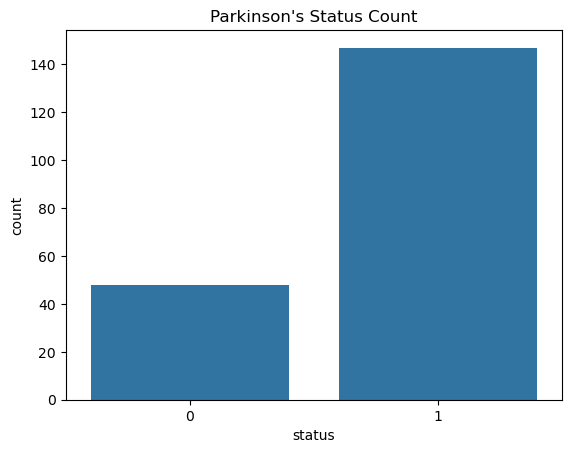

In [9]:
#Status value counts
sns.countplot(x=df['status'])
plt.title("Parkinson's Status Count")
plt.show()


In [10]:
df.drop(['name'],axis=1,inplace=True)

In [11]:
df.corr()['status'].sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

In [12]:
df.drop(['NHR','MDVP:Fhi(Hz)','DFA','MDVP:Fhi(Hz)','NHR','DFA','Jitter:DDP','MDVP:RAP'],axis=1,inplace=True)

In [13]:
x = df.drop('status', axis=1)  # all columns except target
y = df['status']       

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [15]:
#Balance data
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)
print("Before:",y_train.value_counts())
print("After:",y_train_bal.value_counts())


Before: status
1    118
0     38
Name: count, dtype: int64
After: status
0    118
1    118
Name: count, dtype: int64


In [16]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train_bal = scaler.fit_transform(x_train_bal)
x_test  = scaler.transform(x_test)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    'Logistic Regression':{
        'model':LogisticRegression(),
        'params':{}
    },
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{'n_neighbors':[3,5,9,11],'weights':['uniform','distance']}
    },

    'Decision Tree':{
        'model':DecisionTreeClassifier(),
        'params':{'max_depth':[1,2,3,4,5,6,7,8,9,10],
                  'criterion':['gini','entropy']}
    },
    
    'Random Forest':{
        'model':RandomForestClassifier(),
        'params':{'n_estimators':[10,20,30,40,50,60],
                  'criterion':['gini','entropy']}
    }
    }

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

results = []

for name , config in models.items():
  grid = GridSearchCV(config['model'],config['params'],cv=3,scoring='accuracy')
  grid.fit(x_train_bal,y_train_bal)



  y_hat = grid.predict(x_test)
  acc = accuracy_score(y_test,y_hat)
  f1 = f1_score(y_test,y_hat)
  recall = recall_score(y_test,y_hat)
  precision = precision_score(y_test,y_hat)

  results.append({
      'model':name,
      'best_params':grid.best_params_,
      'accuracy':acc,
      'f1_score':f1,
      'recall':recall,
      'precision':precision
  })

In [19]:
result_df  = pd.DataFrame(results).T
result_df

,0,1,2,3
model,Logistic Regression,KNN,Decision Tree,Random Forest
best_params,{},"{'n_neighbors': 3, 'weights': 'distance'}","{'criterion': 'entropy', 'max_depth': 9}","{'criterion': 'entropy', 'n_estimators': 40}"
accuracy,0.74359,0.974359,0.871795,0.923077
f1_score,0.807692,0.982456,0.912281,0.945455
recall,0.724138,0.965517,0.896552,0.896552
precision,0.913043,1.0,0.928571,1.0


In [20]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.03,
    n_estimators=700,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
    reg_alpha=0.0,
    reg_lambda=1.0,
    scale_pos_weight=1,   # because you already balanced the data
    eval_metric='logloss'
)
xgb.fit(x_train_bal, y_train_bal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, ...)

In [21]:
y_pred = xgb.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39

[[ 9  1]
 [ 2 27]]


In [22]:
from sklearn.metrics import roc_curve , roc_auc_score
y_prob = xgb.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])

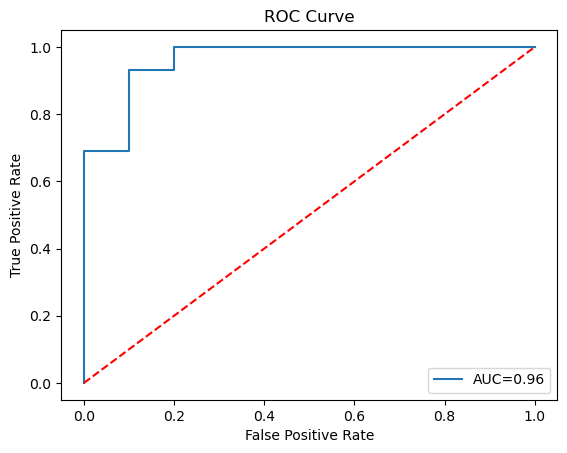

In [23]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [26]:


pipeline = Pipeline([
    ('smote', SMOTE()),
    ('scaler', RobustScaler()),
    ('xgb', XGBClassifier(
        max_depth=5,
        learning_rate=0.03,
        n_estimators=700,
        subsample=1.0,
        colsample_bytree=1.0,
        scale_pos_weight=1,
        eval_metric='logloss'
    ))
])

pipeline.fit(x_train, y_train)  


Pipeline(steps=[('smote', SMOTE()), ('scaler', RobustScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=700, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [27]:
joblib.dump(pipeline, "parkinson_pipeline.pkl")

['parkinson_pipeline.pkl']